# Percentile Method:  
You just choose a threshold, let's say 5, so values below 5 percentile and values above 95 percentile are considered outliers.  
now as alreday known... we can apply either **Trimming** or **Capping** to these outliers. especially in this Percentile Method, Capping is also known as Winsorization technique (named after a someone) 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('assets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

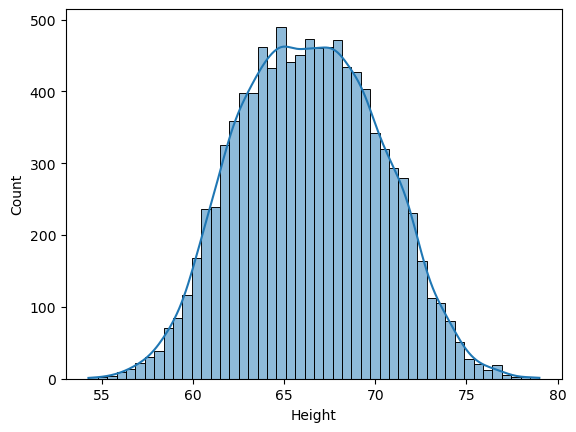

In [6]:
sns.histplot(df['Height'],kde=True) #almost normally distributed

<Axes: ylabel='Height'>

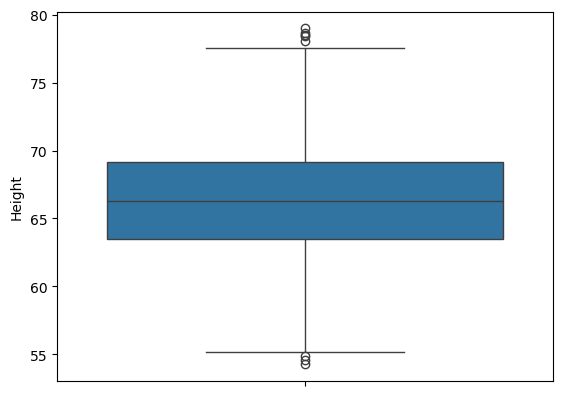

In [7]:
sns.boxplot(df['Height'])

Choosing the percentile threshold, have to make sure to make it equal on both sides, upper and lower

In [8]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [9]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [12]:
df[(df['Height'] >= upper_limit) | (df['Height'] <= lower_limit)] # these are outliers.

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [15]:
# Trimming:
df_trimmed = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [16]:
df_trimmed.Height.describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [17]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

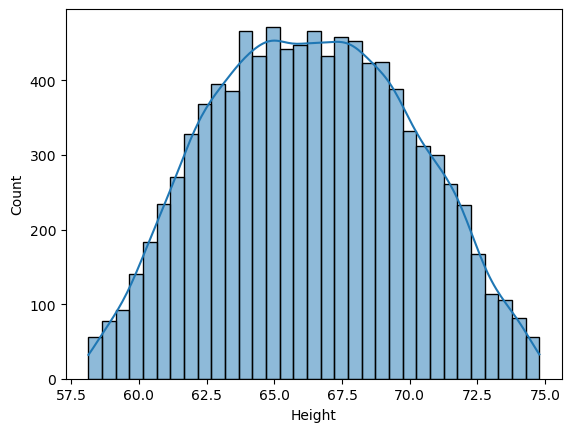

In [18]:
sns.histplot(df_trimmed['Height'],kde=True)

<Axes: ylabel='Height'>

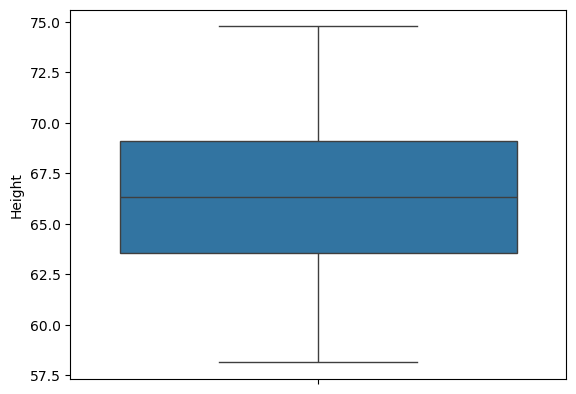

In [19]:
sns.boxplot(df_trimmed['Height'])

In [22]:
# Capping --> Winsorization
df_capped = df.copy()
df_capped['Height'] = np.where(df_capped['Height']>upper_limit,np.round(upper_limit,6),
        np.where(df_capped['Height']<lower_limit,np.round(lower_limit,6),df_capped['Height']))

In [23]:
df_capped[(df_capped['Height'] >= upper_limit) | (df_capped['Height'] <= lower_limit)] # these are outliers.

,Gender,Height,Weight


In [25]:
df_capped['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

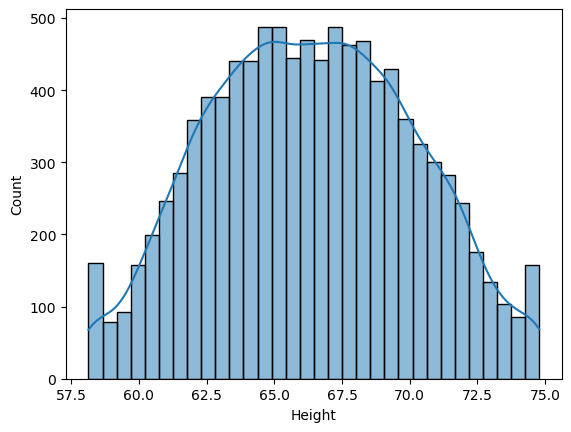

In [26]:
sns.histplot(df_capped['Height'],kde=True) # a little bit increase in edge values cuz we imputed outliers with em

<Axes: ylabel='Height'>

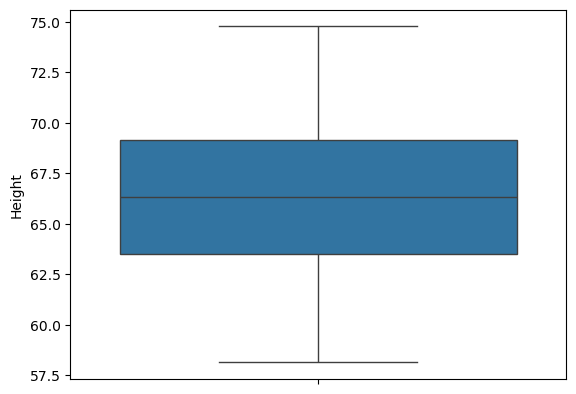

In [27]:
sns.boxplot(df_capped['Height'])